# Step1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error


pd.set_option('display.float_format', '{:.1f}'.format)

import warnings
warnings.filterwarnings("ignore")

# Step2: Load Data

In [2]:
df = pd.read_csv("/kaggle/input/employeeburnout1/EmployeeBurnout1.csv")

# Step3: EDA

In [3]:
#first 10 rows of the data
df.head(10)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,3.0,3.8,0.2
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,2.0,5.0,0.4
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2,NaN,5.8,0.5
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,1.0,2.6,0.2
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,7.0,6.9,0.5
5,fffe3300350037003500,11/26/2008,Male,Product,Yes,2,4.0,3.6,0.3
6,fffe33003300340039003100,1/2/2008,Female,Service,No,3,6.0,7.9,0.6
7,fffe32003600320037003400,10/31/2008,Female,Service,Yes,2,4.0,4.4,0.3
8,fffe32003200300034003700,12/27/2008,Female,Service,No,3,6.0,NaN,0.6
9,fffe31003600320030003200,3/9/2008,Female,Product,No,3,6.0,NaN,0.7


In [4]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,3.0,3.8,0.2
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,2.0,5.0,0.4
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2,NaN,5.8,0.5
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,1.0,2.6,0.2
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,7.0,6.9,0.5


In [5]:
#shape of the data
df.shape

(22750, 9)

In [6]:
#overview information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  int64  
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.6+ MB


In [7]:
#statistical measures in the data
df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.0,21369.0,20633.0,21626.0
mean,2.2,4.5,5.7,0.5
std,1.1,2.0,1.9,0.2
min,0.0,1.0,0.0,0.0
25%,1.0,3.0,4.6,0.3
50%,2.0,4.0,5.9,0.5
75%,3.0,6.0,7.1,0.6
max,5.0,10.0,10.0,1.0


In [8]:
#number of null values in the data
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [9]:
#number of duplicates
df.duplicated().sum()

0

In [10]:
#unique values in categorical features
categorical_columns = ["Gender", "Company Type", "WFH Setup Available", "Designation"]
for column in categorical_columns:
    print(df[column].unique())

['Female' 'Male']
['Service' 'Product']
['No' 'Yes']
[2 1 3 0 4 5]


In [11]:
#data types of the data
df.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation               int64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

In [12]:
#correlation
numerical_columns = ["Resource Allocation", "Mental Fatigue Score", "Burn Rate"]
df[numerical_columns].corr()

,Resource Allocation,Mental Fatigue Score,Burn Rate
Resource Allocation,1.0,0.8,0.9
Mental Fatigue Score,0.8,1.0,0.9
Burn Rate,0.9,0.9,1.0


<Axes: >

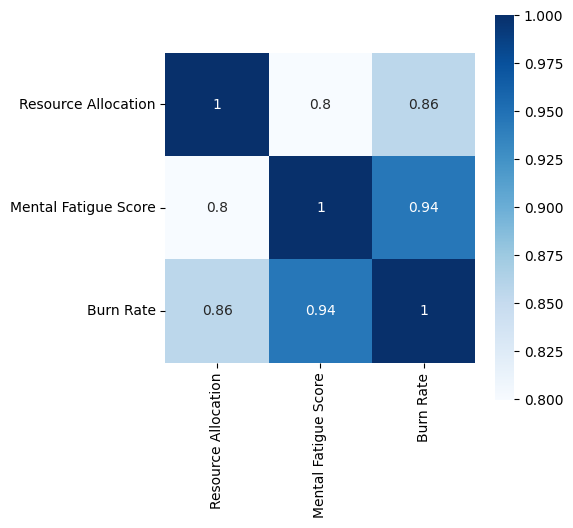

In [13]:
#heatmap for better describing of correlation in the data
plt.figure(figsize = (5, 5))
sns.heatmap(df[numerical_columns].corr(), cbar = True, square = True, annot = True, cmap = "Blues")

array([[<Axes: title={'center': 'Designation'}>,
        <Axes: title={'center': 'Resource Allocation'}>],
       [<Axes: title={'center': 'Mental Fatigue Score'}>,
        <Axes: title={'center': 'Burn Rate'}>]], dtype=object)

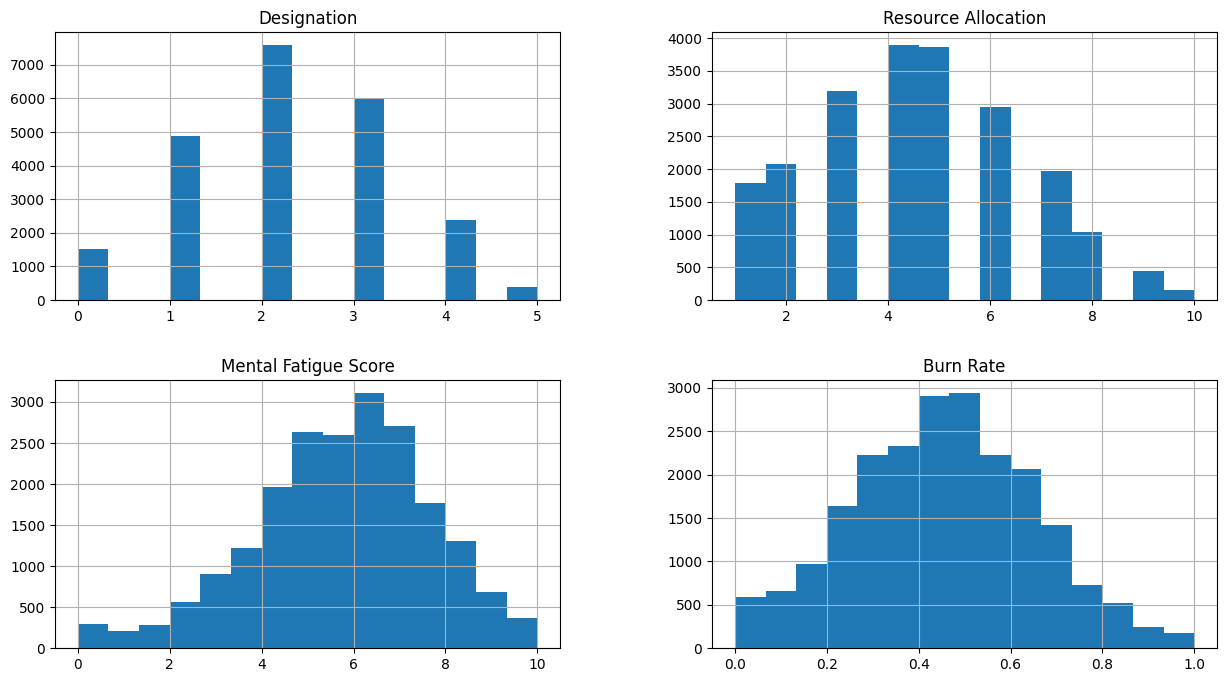

In [14]:
#histograms for all the data
df.hist(bins = 15, figsize = (15, 8))

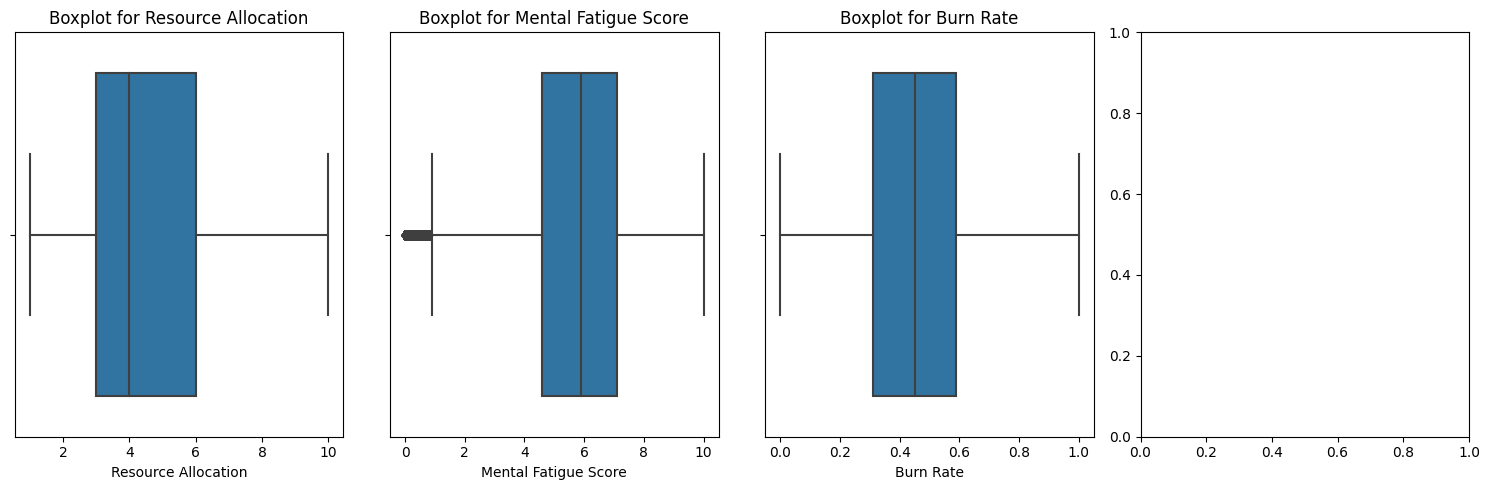

In [15]:
#boxplots to detect the outliers
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

    
plt.tight_layout()
plt.show()

# Step4: Data Preprocessing

In [16]:
#handling outliers function
def handle_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    data[feature]=np.where(data[feature] > upper_limit, upper_limit, np.where(data[feature] < lower_limit, lower_limit, data[feature]))
    return data[feature]

#preprocessing function
def preprocessing(data):
    data=data.copy()
    
    #dropping the ID column because it doesn't matter in the regression problem
    data.drop("Employee ID", axis = 1, inplace = True)
    
    #handling missing values
    data.dropna(subset = ["Burn Rate"], inplace = True)
    data["Resource Allocation"].fillna(data["Resource Allocation"].median(), inplace = True)
    data["Mental Fatigue Score"].fillna(data["Mental Fatigue Score"].median(), inplace = True)
    
    #handling the outliers
    data["Mental Fatigue Score"] = handle_outliers(data,"Mental Fatigue Score")
    
    #turn the date column to three columns (year, month, day)
    data["Date of Joining"] = pd.to_datetime(data["Date of Joining"])
    data["Join Year"] = data["Date of Joining"].apply(lambda x : x.year)
    data["Join Month"] = data["Date of Joining"].apply(lambda x : x.month)
    data["Join Day"] = data["Date of Joining"].apply(lambda x : x.day)
    data.drop("Date of Joining", axis = 1, inplace = True)
    
    #dropping the join year column because it has the same value in all its cells
    data.drop("Join Year", axis = 1, inplace = True)
    
    #encoding categorical features
    data["Gender"].replace({"Female" : 0, "Male" : 1}, inplace = True)
    data["Company Type"].replace({"Service" : 0, "Product" : 1}, inplace = True)
    data["WFH Setup Available"].replace({"No" : 0, "Yes" : 1}, inplace = True)
    
    #scaling
    scaler = StandardScaler()
    df[["Resource Allocation", "Mental Fatigue Score"]] = scaler.fit_transform(df[["Resource Allocation", "Mental Fatigue Score"]])
    
    #splitting data to train and test
    x = data.drop("Burn Rate", axis = 1)
    y = data["Burn Rate"]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)
    
    return x_train, x_test, y_train, y_test

In [17]:
X_train, X_test, y_train, y_test = preprocessing(df)

# Step5: Modelling 

In [18]:
#list of regression models
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor()),
    ('K-Neighbors Regressor', KNeighborsRegressor()),
    ('XGBoost Regressor', xgb.XGBRegressor(objective='reg:squarederror'))
]

#evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name}: MSE = {mse:.4f}, RMSE = {rmse:.4f}")

Linear Regression: MSE = 0.0050, RMSE = 0.0706
Decision Tree Regressor: MSE = 0.0074, RMSE = 0.0859
Random Forest Regressor: MSE = 0.0041, RMSE = 0.0644
Gradient Boosting Regressor: MSE = 0.0039, RMSE = 0.0625
K-Neighbors Regressor: MSE = 0.0056, RMSE = 0.0749
XGBoost Regressor: MSE = 0.0039, RMSE = 0.0623
